In [136]:
# SVM Classification
import pandas as pd
import numpy as np
# from sklearn.preprocessing import StandardScaler

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [137]:

file_path = r'C:\Users\Kashi\Downloads\forestfires.csv'

# Read the CSV file
df = pd.read_csv(file_path)

df.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [139]:
df.shape

(517, 31)

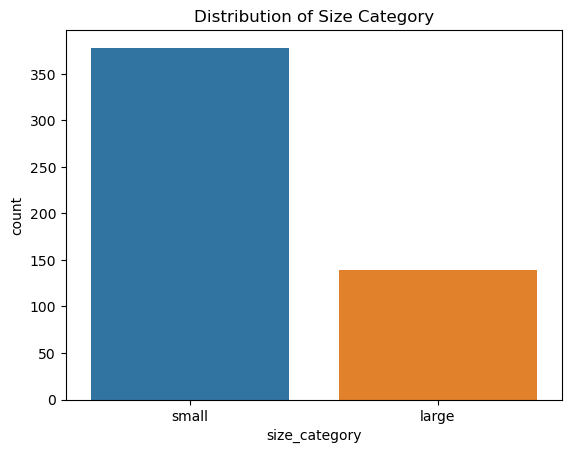

In [140]:
sns.countplot(x='size_category', data=df)
plt.title('Distribution of Size Category')
plt.show()

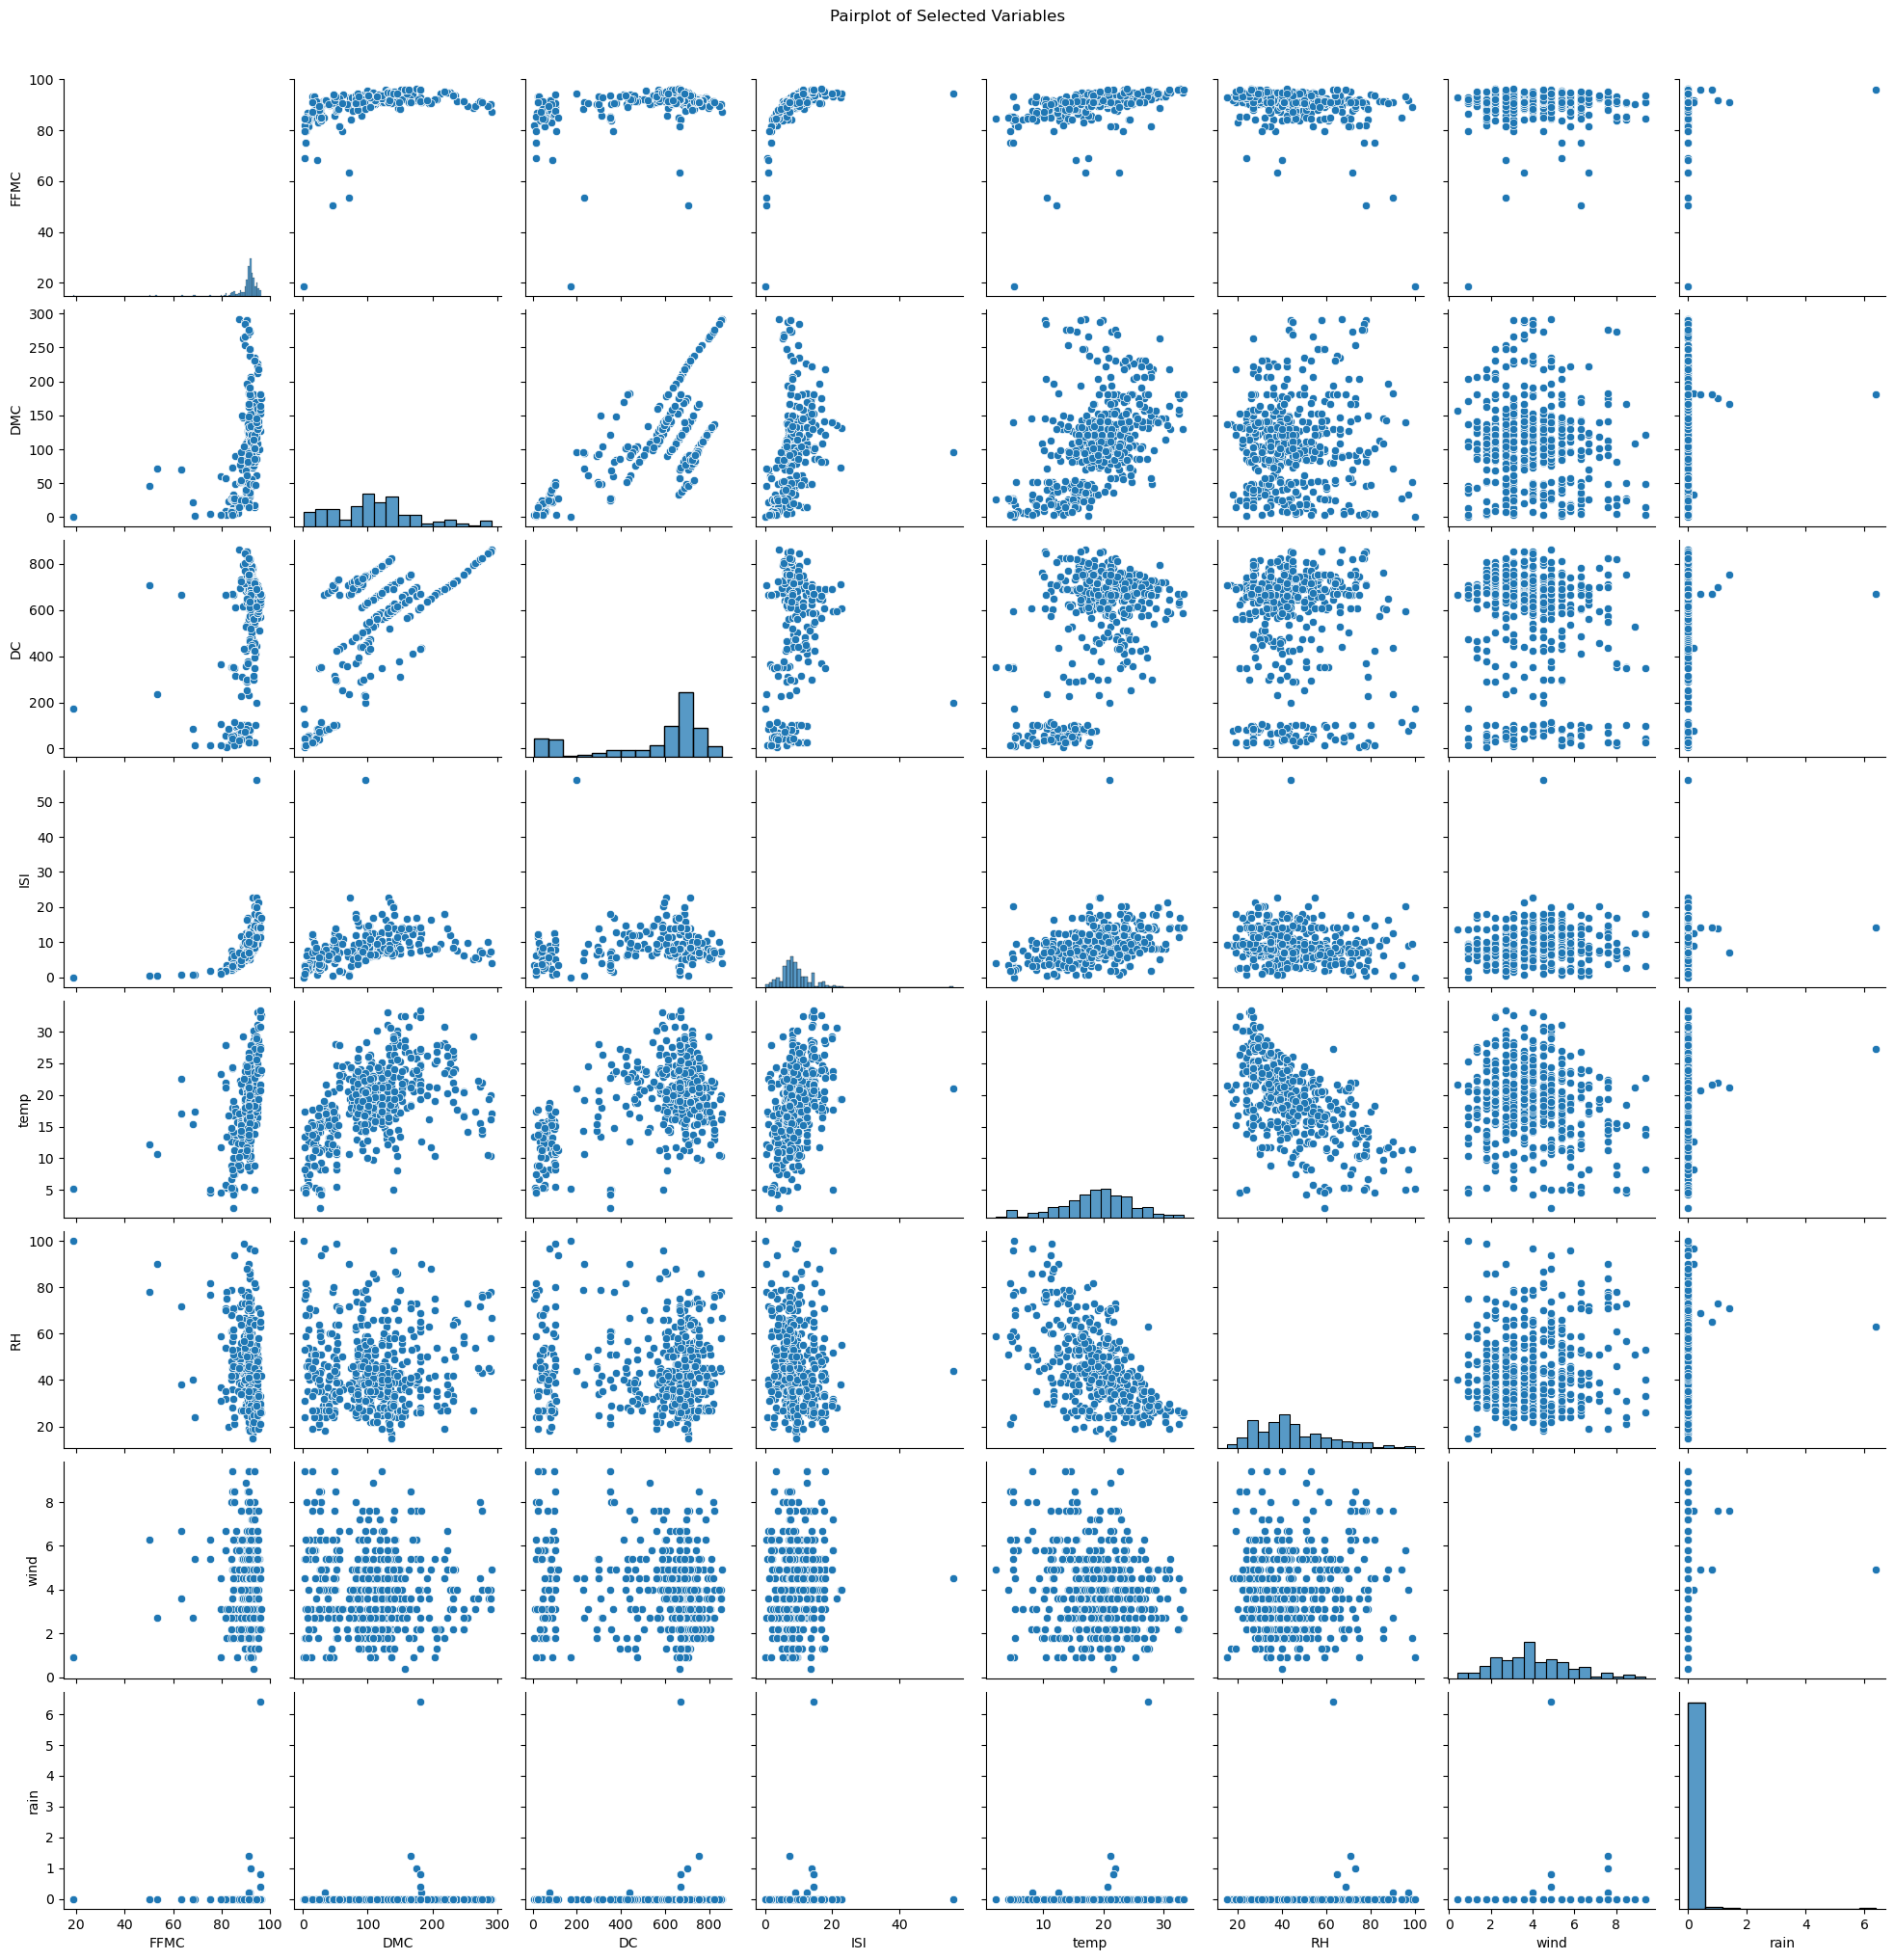

In [141]:
selected_vars = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
sns.pairplot(df[selected_vars])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

Text(0.5, 1.0, 'Distribution of Fires by Month')

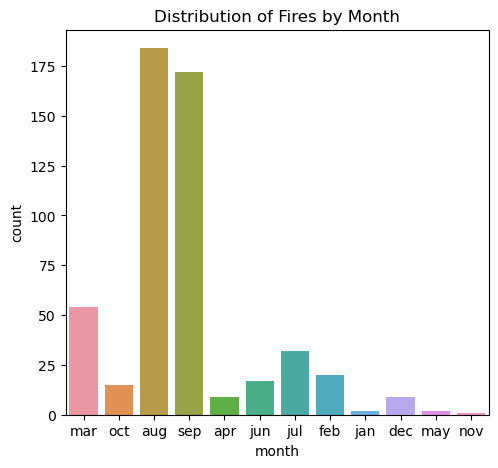

In [142]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='month', data=df)
plt.title('Distribution of Fires by Month')

In [143]:
df =df.drop(columns=['day','monthfeb', 'monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep','daymon','daysat','daysun','daythu','daytue','daywed','dayfri','monthapr','monthaug','monthdec'])

In [144]:
df.head()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [145]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['month']= le.fit_transform(df['month'])
df['size_category']= le.fit_transform(df['size_category'])
df.head()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [153]:
from sklearn.preprocessing import StandardScaler 
se = StandardScaler()
df[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']] = se.fit_transform(df[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']])
df.head()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1
1,10,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,1
2,10,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,1
3,7,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1
4,7,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,1


In [154]:
x = df.iloc[:,0:10]
y = df.iloc[:,10]

In [155]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [156]:
model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(x,y)

In [157]:
fit.n_features_

5

In [158]:
fit.ranking_

array([6, 3, 1, 5, 4, 1, 1, 2, 1, 1])

In [159]:
d = {'f': x.columns, "v":fit.ranking_}
imp = pd.DataFrame(d)
imp.sort_values('v', ascending=True, inplace = True)
imp

,f,v
2,DMC,1
5,temp,1
6,RH,1
8,rain,1
9,area,1
7,wind,2
1,FFMC,3
4,ISI,4
3,DC,5
0,month,6


In [162]:
df1 = df.copy()
df1 = df1.drop(['wind','FFMC','ISI','DC','month'], axis =1)

In [163]:
df1.head()

,DMC,temp,RH,rain,area,size_category
0,-1.323326,-1.842640,0.411724,-0.073268,-0.20202,1
1,-1.179541,-0.153278,-0.692456,-0.073268,-0.20202,1
2,-1.049822,-0.739383,-0.692456,-0.073268,-0.20202,1
3,-1.212361,-1.825402,3.233519,0.603155,-0.20202,1
4,-0.931043,-1.291012,3.356206,-0.073268,-0.20202,1


In [166]:
x = df1.iloc[:,0:5]
y = df1.iloc[:,5]

In [167]:
x.head()

,DMC,temp,RH,rain,area
0,-1.323326,-1.842640,0.411724,-0.073268,-0.20202
1,-1.179541,-0.153278,-0.692456,-0.073268,-0.20202
2,-1.049822,-0.739383,-0.692456,-0.073268,-0.20202
3,-1.212361,-1.825402,3.233519,0.603155,-0.20202
4,-0.931043,-1.291012,3.356206,-0.073268,-0.20202


In [168]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [176]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf','poly'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.01] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=6,)
gsv.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.01],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf', 'poly']}])

In [177]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'linear', 'gamma': 0.01, 'C': 10}, 0.9861111111111112)

In [178]:
clf = SVC(kernel='linear',gamma = 0.01,C=10)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 98.07692307692307


array([[ 38,   3],
       [  0, 115]], dtype=int64)

In [179]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1])

In [180]:
confusion_matrix(y_test,y_pred)

array([[ 38,   3],
       [  0, 115]], dtype=int64)

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.97      1.00      0.99       115

    accuracy                           0.98       156
   macro avg       0.99      0.96      0.97       156
weighted avg       0.98      0.98      0.98       156

